In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [46]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=3.5, random_state=42)
X.shape, y.shape, X[:5], y[:5]

((100, 2),
 (100,),
 array([[-4.18630746,  8.36447971],
        [ 8.43055819,  5.66147687],
        [-4.41453716,  9.40251519],
        [ 7.5170894 ,  8.61194512],
        [ 5.43598861,  6.54816932]]),
 array([0, 1, 0, 1, 1]))

In [66]:
y = np.where(y == 0, -1, y)
y[:10]

array([-1,  1, -1,  1,  1, -1,  1,  1, -1, -1])

In [70]:
np.random.seed(42)
w = np.random.rand(2,)
b = np.random.rand()
w, b

(array([0.37454012, 0.95071431]), 0.7319939418114051)

In [74]:
def predict(X, w, b):
    m = X.shape[0]
    y_preds = np.zeros(m)
    for i in range(m):
        y_preds[i] = np.dot(w, X[i]) + b
    y_preds = np.sign(y_preds)
    return y_preds

In [78]:
predict(X[:10], w, b)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [82]:
def plot_true_vs_preds(X, y, w, b):
    # Set limits for the plot display
    xlim = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    ylim = [X[:, 1].min() - 1, X[:, 1].max() + 1]

    # y_true plot
    plt.figure(figsize=(5, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o')
    plt.title("y_true")
    plt.xlim(xlim)
    plt.ylim(ylim)

    # y_preds plot
    plt.figure(figsize=(5, 4))
    y_preds = predict(X, w, b)
    plt.scatter(X[:, 0], X[:, 1], c=y_preds, cmap='bwr', marker='o')
    plt.title("y_preds")
    plt.xlim(xlim)
    plt.ylim(ylim)

    # drawing decision boundaries & margin
    xx = np.array(xlim)
    yyn = (-1 - b - (w[0] * xx)) / w[1]
    yym = (-b - (w[0] * xx)) / w[1]
    yyp = (1 - b - (w[0] * xx)) / w[1]

    plt.plot(xx, yyn, color='black', linestyle='dotted')
    plt.plot(xx, yym, color='black')
    plt.plot(xx, yyp, color='black', linestyle='dotted')

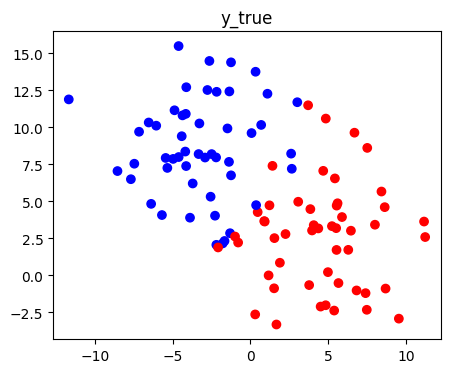

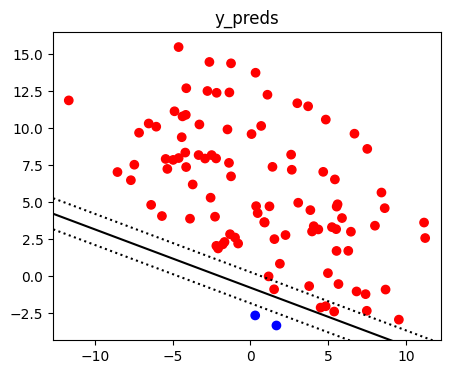

In [84]:
plot_true_vs_preds(X, y, w, b)

In [88]:
# calculating hinge loss
def calc_hinge_loss(X_i, y_i, w, b):
    return max(0, 1 - y_i * (np.dot(w, X_i) + b))

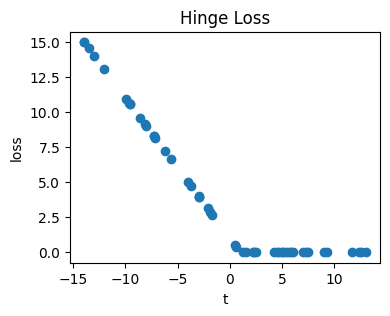

In [96]:
n_examples = 50
t = np.zeros(n_examples)
loss = np.zeros(n_examples)

for i in range(n_examples):
    t[i] = y[i] * (np.dot(w, X[i]) + b)
    loss[i] = calc_hinge_loss(X[i], y[i], w, b)

plt.figure(figsize=(4, 3))
plt.scatter(t, loss)
plt.title("Hinge Loss")
plt.xlabel("t")
plt.ylabel("loss")
plt.show()

In [104]:
# calculating the cost function
def calc_cost(X, y, w, b, C=1):
    m = X.shape[0]

    margin_cost = (np.dot(w, w) ** 2) / 2
    hinge_cost = 0
    for i in range(m):
        loss_i = calc_hinge_loss(X[i], y[i], w, b)
        hinge_cost += loss_i
    hinge_cost *= C

    total_cost = margin_cost + hinge_cost
    return total_cost

In [108]:
calc_cost(X, y, w, b)

442.79701081354773

In [116]:
# minimize the cost by applying gradient descent
def calc_gradient(X, y, w, b, C=1):
    n = X.shape[1]
    m = X.shape[0]

    dj_dw = np.zeros(n)
    dj_db = 0.

    for i in range(m):
        hinge_condition = (1 - y[i] * (np.dot(w, X[i]) + b)) > 0
        if hinge_condition:
            dj_dw += w - (C * y[i] * X[i])
            dj_db += -C * y[i]
        else:
            dj_dw += w
    return dj_dw, dj_db

In [122]:
dj_dw, dj_db = calc_gradient(X, y, w, b)
dj_dw, dj_db

(array([-140.17224695,  537.4465191 ]), 44.0)

In [130]:
alpha = 0.001
w_new = w - alpha * dj_dw
b_new = b - alpha * dj_db

print(f"Before: {calc_cost(X, y, w, b)}")
print(f"After: {calc_cost(X, y, w_new, b_new)}")

Before: 442.79701081354773
After: 182.42954655729315


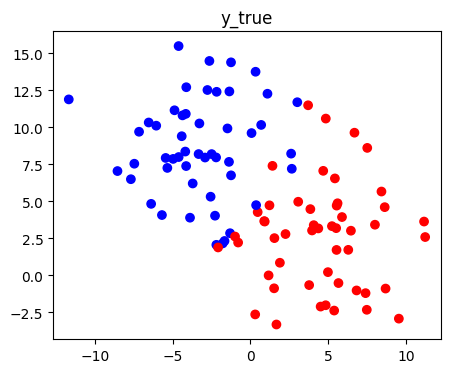

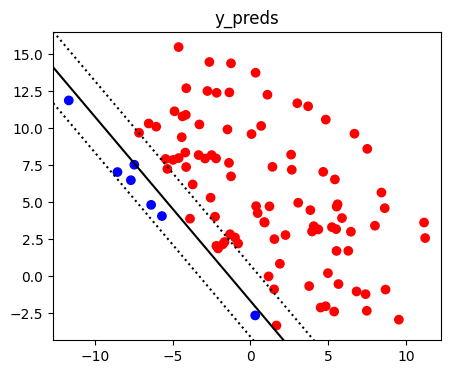

In [132]:
plot_true_vs_preds(X, y, w_new, b_new)

In [158]:
# improving gradient descent 
def gradient_descent(X, y, w, b, n_iters=1000, C=1, alpha=0.0001, history_step=100):
    history = {}

    for iter in range(n_iters):
        dj_dw, dj_db = calc_gradient(X, y, w, b, C)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if iter % 100 == 0:
            cost = calc_cost(X, y, w, b, C)
            print(f"Iter\t{iter}\tCost\t{cost}")
            history[iter] = cost

    return history, w, b

In [160]:
history, w_new, b_new = gradient_descent(X, y, w, b)

Iter	0	Cost	416.2496965144751
Iter	100	Cost	17.39308445220519
Iter	200	Cost	18.21425148888366
Iter	300	Cost	18.22369527629638
Iter	400	Cost	18.183961692605983
Iter	500	Cost	18.17848263566393
Iter	600	Cost	18.19673804505704
Iter	700	Cost	18.191742956510595
Iter	800	Cost	18.171144403885297
Iter	900	Cost	18.19895789930862


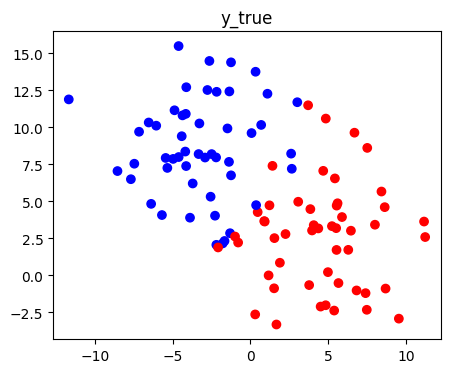

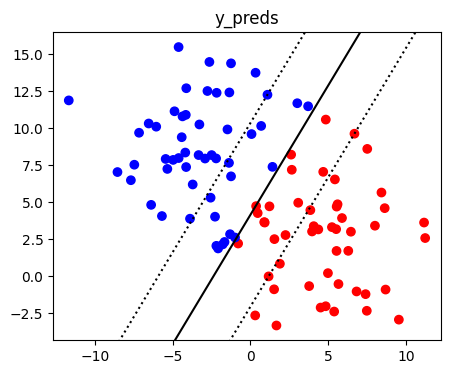

In [162]:
plot_true_vs_preds(X, y, w_new, b_new)

In [196]:
def plot_history(history):
    plt.figure(figsize=(4, 3))
    plt.plot(history.keys(), history.values())
    plt.title("Cost over iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")

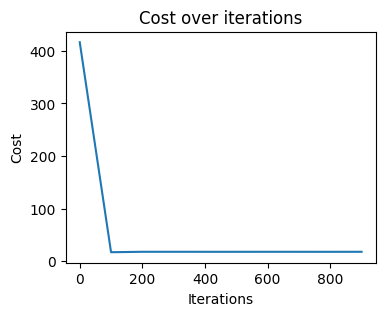

In [200]:
plot_history(history)